# Demo of data cube functionalities: 
# Correlation of S5P L4 Assimilated NO$_2$ with Building Height
Here we demonstrate how to correlate Sentinel 5P/TROPOMI-assimilated NO2 data with building heights using EOC data cube functionalities. 

## Let's start with some relevant settings
<div class="alert alert-block alert-success">
To identify the relevant STAC collection, visit https://geotest.eoc.dlr.de/eoc/ogc/stac with your browser.
</div>

In [1]:
stacapi_endpoint = "https://geoservice.dlr.de/eoc/ogc/stac/v1/?f=application%2Fjson"

In [2]:
stacapi_endpoint_test = "https://geotest.eoc.dlr.de/eoc/ogc/stac/v1/"

In [3]:
bbox = [3.8, 46.82, 15.23, 54.44]

resolution=(0.06,0.09) # 0.06x0.09 deg is original resolution of TROPOMI L4 Surface NO2 Model Result

In [4]:
building_collection_name = ["IOER_STRUCTURE_HEIGHT_GER_100M"]
building_dates_from_to = ["2023-01-01", "2023-12-31"]

In [5]:
no2_collection_name = ["S5P_TROPOMI_L4_P1D_NO2surf"]
no2_dates_from_to = ["2023-01-25", "2023-09-30"]

### Do Python library imports

In [6]:
from pystac_client import Client

from odc.stac import stac_load
from odc.geo  import resxy_
import xarray as xr

In [8]:
import geopandas as gpd

In [28]:
from matplotlib.colors import LinearSegmentedColormap

In [27]:
import warnings
warnings.filterwarnings('ignore')

## Load NO$_2$ Surface Concentrations (derived from S5P TROPOMI)

<div class="alert alert-block alert-success">
Discover and access surface NO$_2$ in its original resolution.</div>

### Discover Dataset

<div class="alert alert-block alert-success">
Connect to STAC API and discover surface NO$_2$ concentrations.</div>

In [29]:
%%time 

catalog_no2 = Client.open(
    url=stacapi_endpoint_test,
    ignore_conformance=True
)

no2_stac_items = catalog_no2.search(
    collections=no2_collection_name, 
    datetime=no2_dates_from_to, 
    bbox=bbox,
    method="GET", 
    filter_lang="cql2-text",
    max_items=1000
).get_all_items()

CPU times: user 256 ms, sys: 20.4 ms, total: 277 ms
Wall time: 8.39 s


In [10]:
print ("Number of STAC items: ", len(no2_stac_items))

Number of STAC items:  214


### Access Dataset

<div class="alert alert-block alert-success">
Access surface NO$_2$ concentrations and download dataset in its original resolution to your local memory.</div>

In [11]:
%%time

# ACCESS AND DOWNLOAD IN ORIGINAL RESOLUTION

no2surf = stac_load(
    no2_stac_items,
    crs="EPSG:4326",
    resolution=resxy_(0.09, -0.06), # 0.0174532925199433
    dtype="float",
    lon=(bbox[0], bbox[2]),
    lat=(bbox[1], bbox[3]),)

print ("Data is extracted in its original resolution on the server and downloaded to local storage.")

Data is extracted in its original resolution on the server and downloaded to local storage.
CPU times: user 6.46 s, sys: 15.9 s, total: 22.4 s
Wall time: 44.4 s


In [12]:
no2surf

<xarray.Dataset>
Dimensions:      (latitude: 128, longitude: 128, time: 214)
Coordinates:
  * latitude     (latitude) float64 54.45 54.39 54.33 ... 46.95 46.89 46.83
  * longitude    (longitude) float64 3.825 3.915 4.005 ... 15.07 15.16 15.25
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2023-01-25T15:00:00 ... 2023-09-27T15:...
Data variables:
    no2surf      (time, latitude, longitude) float64 34.64 35.42 ... 1.67 2.203

## Show Temporal Average of Surface NO$_2$

<div class="alert alert-block alert-success">
Temporal Average Over Complete Period.</div>

### Compute temporal average

In [13]:
no2surf["average"] = no2surf.no2surf.mean(dim="time")

### Show temporal average of NO$_2$ surface concentration.

In [24]:
cmap = LinearSegmentedColormap.from_list("", ["white", "violet", "red","blue"])

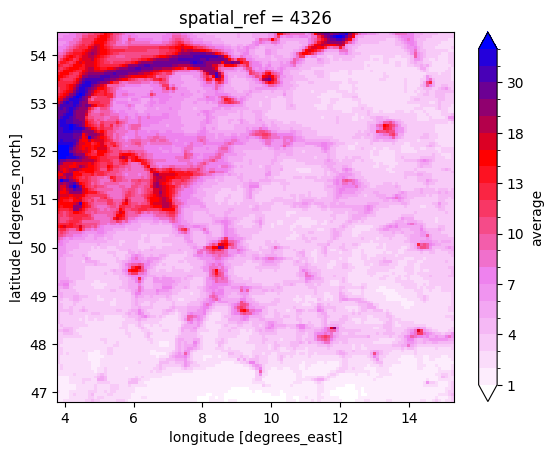

In [25]:
no2surf.average.plot(levels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20,25,30,35,40], cmap=cmap) # "gist_ncar_r")

## Load information on buildings in identical spatial resolution

<div class="alert alert-block alert-success">
Building heights [m] as determined by the Leibniz-Institut für ökologische Raumentwicklung e.V. Dresden (IOER).
</div>

In [80]:
catalog = Client.open(
    url=stacapi_endpoint,
    ignore_conformance=True
)

### Discover building height datasets
<div class="alert alert-block alert-success">
Data discovery is performed according to our settings
</div>

In [81]:
building_stac_items = catalog.search(
    collections=building_collection_name, 
    datetime=building_dates_from_to, 
    bbox=bbox,
    method="GET", 
    filter_lang="cql2-text",
    max_items=1000
).get_all_items()

In [82]:
building_stac_items

In [83]:
len(building_stac_items)

54

*--> Now we identified the relevant datasets which we need for our research.*

### Load the building heights to local storage

<div class="alert alert-block alert-success">
Now the data of the identifed data sets is going to be downloaded to the local client.

You can concentrate on your work. All ugly work such as 
- re-projection or
- area-slicing 
 
is done on the server.</div>

In [85]:
%%time

building_height = stac_load(
    building_stac_items,
    crs="EPSG:4326",
    resolution=resxy_(0.09, -0.06), # 0.0174532925199433
    dtype="float",
    lon=(bbox[0], bbox[2]),
    lat=(bbox[1], bbox[3]),)

print ("Data is extracted on the server and downloaded to local storage.")

Data is extracted on the server and downloaded to local storage.
CPU times: user 3.73 s, sys: 4.39 s, total: 8.13 s
Wall time: 8.34 s


In [86]:
building_height

<xarray.Dataset>
Dimensions:      (latitude: 128, longitude: 128, time: 54)
Coordinates:
  * latitude     (latitude) float64 54.45 54.39 54.33 ... 46.95 46.89 46.83
  * longitude    (longitude) float64 3.825 3.915 4.005 ... 15.07 15.16 15.25
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2023-06-05T17:48:18.629374 ... 2023-06...
Data variables:
    height       (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [87]:
building_height["total"] = building_height.height.sum(dim="time")

## Show Building Heights on final grid

<div class="alert alert-block alert-success">
Building heights [m] as determined by the Leibniz-Institut für ökologische Raumentwicklung e.V. Dresden (IOER).</div>

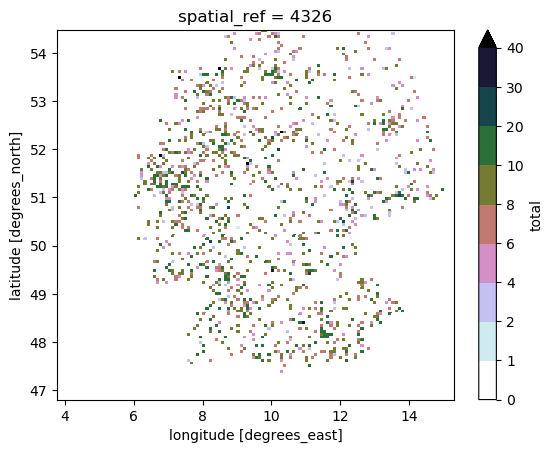

In [92]:
building_height.total.plot(levels=[0,1,2,4,6,8,10,20,30,40], cmap="cubehelix_r")

## Import German Boundaries (as Shapefile)

<div class="alert alert-block alert-success">
Use shapefile to only consider S5P-TROPOMI L4 NO$_2$ information over Germany.
</div>

In [108]:
gdf = gpd.read_file('de_1km.shp')

In [110]:
# Change projection to EPSG:4326

gdf_4326 = gdf.to_crs("epsg:4326")

In [111]:
no2surf.attrs["nodata"] = numpy.nan

In [112]:
import geopandas
from rasterio import features
from affine import Affine
import numpy as np
import xray
import matplotlib.pyplot as plt
%matplotlib inline

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='latitude', longitude='longitude',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xray.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

In [113]:
no2surf_Germany = rasterize(gdf_4326["geometry"], no2surf, longitude='longitude', latitude='latitude')

In [114]:
no2surf_Germany[:,:]

<xarray.DataArray (latitude: 128, longitude: 128)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 54.45 54.39 54.33 54.27 ... 46.95 46.89 46.83
  * longitude  (longitude) float64 3.825 3.915 4.005 4.095 ... 15.07 15.16 15.25

## Show German Boundary

<div class="alert alert-block alert-success">
Rasterize building heights [m] (determined by the Leibniz-Institut für ökologische Raumentwicklung e.V. Dresden (IOER)) onto the identical "work" grid (which was determined by the NO2 product).</div>

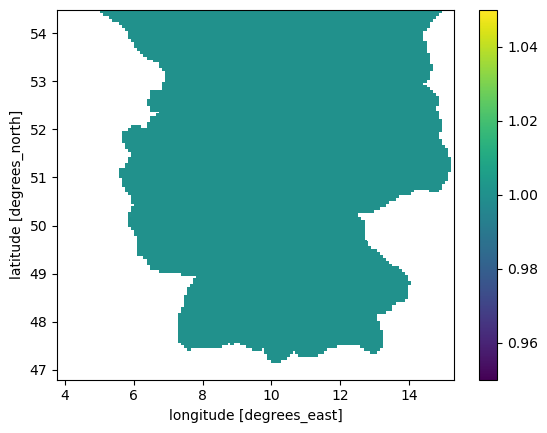

In [115]:
no2surf_Germany.plot()

## Perform correlation between building height [m] and S5P-L4 surface NO$_2$ [ug/m3]

<div class="alert alert-block alert-success">
Perform correlation between averaged building heights and TROPOMI L4 surface NO2 concentration.</div>

In [165]:
correlation_x = building_height.total.values.ravel()

In [166]:
correlation_y_temp = no2surf_Germany.values * no2surf.average.values

In [167]:
correlation_y = correlation_y_temp.flatten()

## Compute and show correlation

<div class="alert alert-block alert-success">Compute and show correlation between building height and time-averaged NO$_2$ surface concentration derived from S5P TROPOMI data assimilation. </div>

In [180]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = numpy.zeros((0), dtype=float)
y = numpy.zeros((0), dtype=float)

for i in range(0,correlation_x.shape[0]):
    if (0 < correlation_x[i] and correlation_x[i] <= 80) and (0 < correlation_y[i] and correlation_y[i] <= 80):
        x = np.append(x, correlation_x[i])
        y = np.append(y, correlation_y[i])
        
xy = numpy.vstack([x,y])

z = gaussian_kde(xy)(xy)

## Correlation between surface NO$_2$ and building heights

<div class="alert alert-block alert-success">Show correlation between building height and NO$_2$ surface concentration derived from S5P TROPOMI data assimilation. </div>

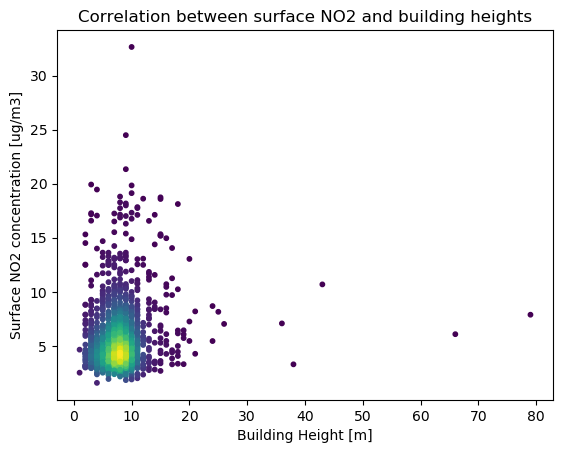

In [189]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10)
ax.set_title("Correlation between surface NO2 and building heights")
ax.set_xlabel("Building Height [m]")
ax.set_ylabel("Surface NO2 concentration [ug/m3]")
plt.show()